In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline




In [20]:
customers = pd.read_csv('/content/House Price Prediction.csv')
customers.head()

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0


In [21]:
customers.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1259 non-null   float64
 1   BHK       1259 non-null   int64  
 2   Bathroom  1257 non-null   float64
 3   Locality  1259 non-null   object 
 4   Parking   1226 non-null   float64
 5   Price     1259 non-null   int64  
 6   Per_Sqft  1018 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 69.0+ KB


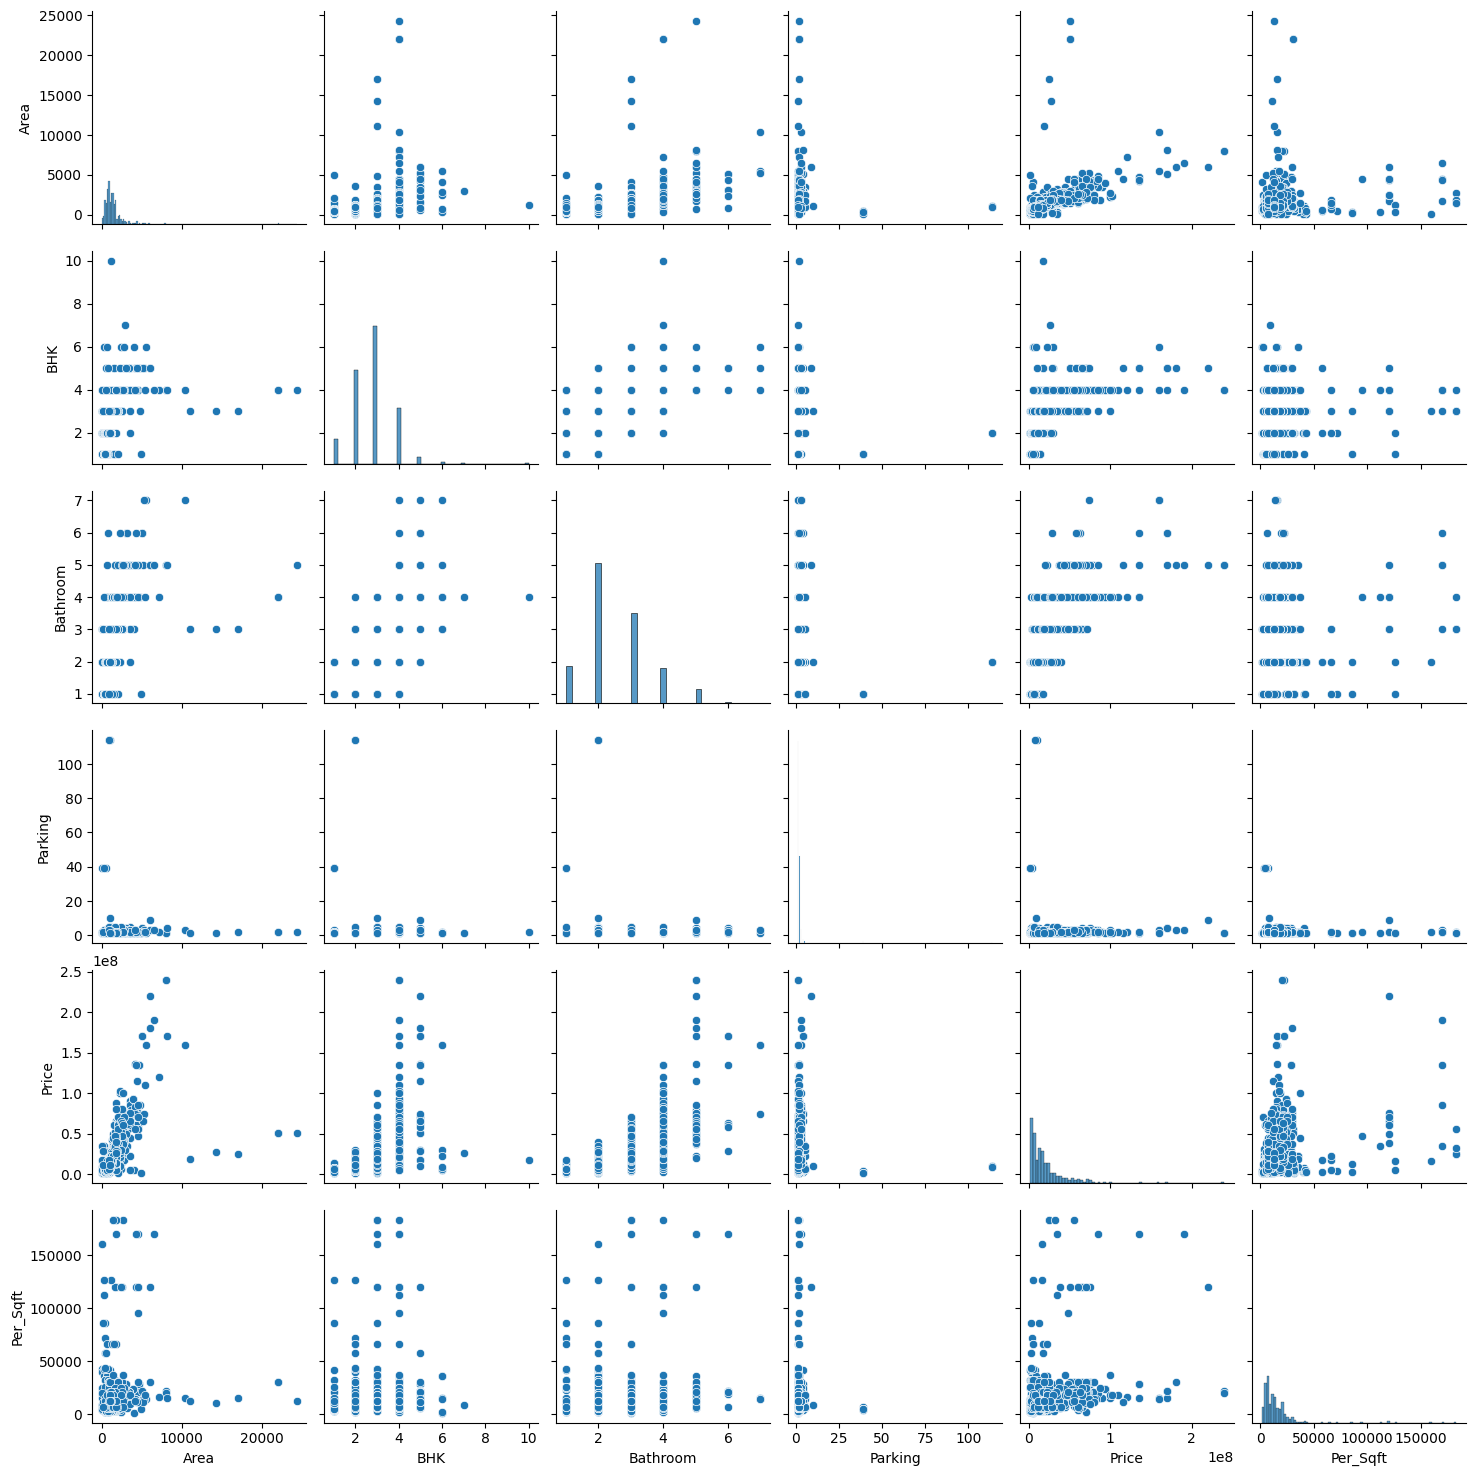

In [23]:
sns.pairplot(customers)

In [24]:
scaler = StandardScaler()

X=customers.drop(['Price','Locality'],axis=1)
y=customers['Price']

cols = X.columns

X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)

X_test_imputed = imputer.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_imputed, y_train)

pred = lr.predict(X_test_imputed)

r2_score(y_test, pred)


0.5820524532418268

In [59]:
lr = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                     ('lr', LinearRegression())])


<Axes: xlabel='Price'>

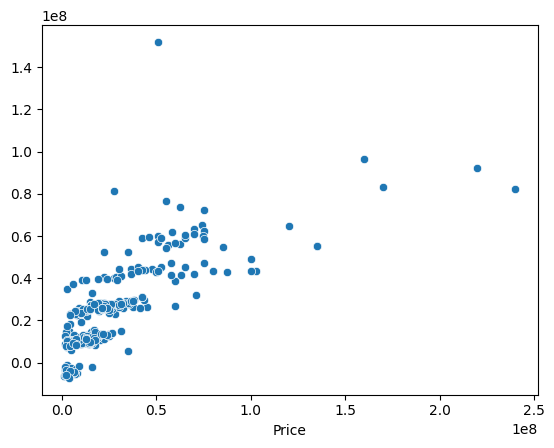

In [46]:
sns.scatterplot(x=y_test, y=pred)

<Axes: xlabel='Price', ylabel='Count'>

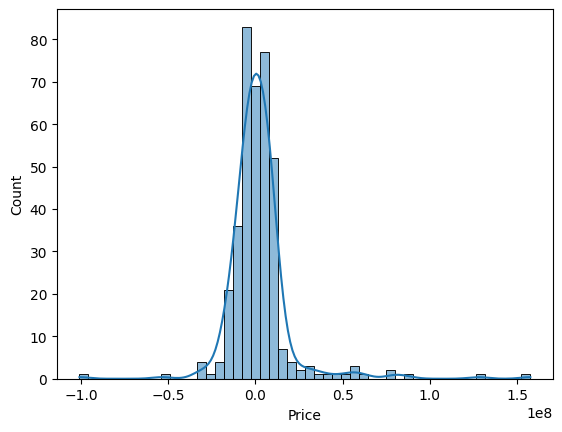

In [47]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [60]:
coefficients = pipeline.named_steps['lr'].coef_
cdf = pd.DataFrame(coefficients)

cdf = cdf.assign(coefficients=coefficients)
cdf = cdf.sort_values('coefficients', ascending=False)

print(cdf)


              0  coefficients
2  1.416523e+07  1.416523e+07
0  6.816682e+06  6.816682e+06
4  3.965309e+06  3.965309e+06
3  4.094565e+05  4.094565e+05
1 -6.241929e+05 -6.241929e+05
